<a href="https://colab.research.google.com/github/contourdesign/ez-SP500/blob/main/SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get up-to-date S&P500 data very easily!

In [19]:
# dependencies
import pandas as pd
import numpy as np

In [9]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 27)

SP500 = web.DataReader(['sp500'], 'fred', start, end)

In [12]:
SP500.head()

,sp500
DATE,
2011-09-12,1162.27
2011-09-13,1172.87
2011-09-14,1188.68
2011-09-15,1209.11
2011-09-16,1216.01


In [13]:
# create calculated column for daily return amount
SP500['daily_return'] = (SP500['sp500']/ SP500['sp500'].shift(1)) -1

#Drop all Not a number values using drop method.
SP500.dropna(inplace = True)

In [14]:
SP500.head()

,sp500,daily_return
DATE,,
2011-09-13,1172.87,0.009120
2011-09-14,1188.68,0.013480
2011-09-15,1209.11,0.017187
2011-09-16,1216.01,0.005707
2011-09-19,1204.09,-0.009803


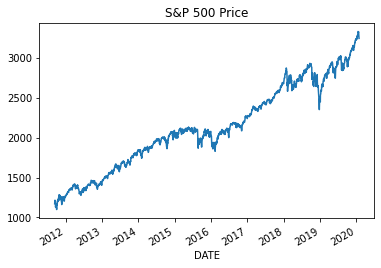

In [15]:
SP500['sp500'].plot(title='S&P 500 Price')

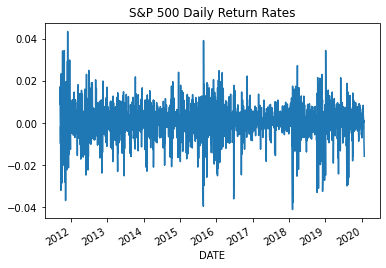

In [16]:
SP500['daily_return'].plot(title='S&P 500 Daily Return Rates')

In [18]:
# Derive monthly lists of return info
Jan = []
Feb = []
Mar = []
Apr = []
May = []
Jun = []
Jul = []
Aug = []
Sep = []
Oct = []
Nov = []
Dec = []

def get_returns(month, returns):
  if month == '01':
    Jan.append(float(returns))
  elif month == '02':
    Feb.append(float(returns))
  elif month == '03':
    Mar.append(float(returns))
  elif month == '04':
    Apr.append(float(returns))
  elif month == '05':
    May.append(float(returns))
  elif month == '06':
    Jun.append(float(returns))
  elif month == '07':
    Jul.append(float(returns))
  elif month == '08':
    Aug.append(float(returns))
  elif month == '09':
    Sep.append(float(returns))
  elif month == '10':
    Oct.append(float(returns))
  elif month == '11':
    Nov.append(float(returns))
  elif month == '12':
    Dec.append(float(returns))
  else:
    print('something went wrong')

In [20]:
#loop thru the dataset and append return values for each month
for i in range(0, len(SP500)):
  df_date = str(SP500.index[i])
  df_returns = SP500['daily_return'][i]
  df_month = df_date.split('-')[1]
  #add returns to each monthly list
  get_returns(df_month, df_returns)

In [21]:
# average the return in each month
def AVG(month):
  return [sum(month)/len(month)]

In [22]:
# create new df
df_AVG = pd.DataFrame()
# retrieve avg returns and put them into a new col
df_AVG['AVG'] = AVG(Jan) + AVG(Feb)+ AVG(Mar)+ AVG(Apr)+ AVG(May)+ AVG(Jun)+ AVG(Jul)+ AVG(Aug)+ AVG(Sep)+ AVG(Oct)+ AVG(Nov)+ AVG(Dec)

# set index to month
df_AVG = df_AVG.set_index(df_AVG.index +1)

In [23]:
# display returns
df_AVG * 100

,AVG
1,0.061032
2,0.099811
3,0.066819
4,0.063429
5,-0.012018
6,0.061862
7,0.105960
8,-0.012379
9,0.009306
10,0.095739


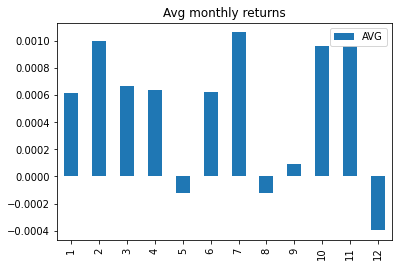

In [25]:
df_AVG.plot.bar(title='Avg monthly returns')